In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [7]:
data.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


In [8]:
pip install scikit-learn

In [65]:
X=data[["CO", "NOX", "PM25", "SO2"]] # variable independiente
y=data["PM10"] # variable dependiente, va solo un corchete

In [66]:
split_index = int(len(data)*0.8)

In [67]:
len(data)

3073

In [68]:
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred=model.predict(X_test)

In [72]:
coeficientes = pd.DataFrame({'Variable':X.columns,
                             'Coeficientes': model.coef_})

In [73]:
coeficientes.shape

(4, 2)

In [74]:
coeficientes.head()

,Variable,Coeficientes
0,CO,-21.240472
1,NOX,0.530047
2,PM25,1.341258
3,SO2,0.122226


In [75]:
print(f"intercepto:{model.intercept_}")

intercepto:2.542471488012616


In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [77]:
r2=r2_score(y_test, y_pred)

In [78]:
r2

0.7494314866330515

In [79]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
rmse

7.149329038511094

In [81]:
mae = mean_absolute_error(y_test, y_pred)

In [82]:
mae

5.463133609444374

In [83]:
y_pred

array([31.38002881, 37.86450851, 32.04174414, 26.0631386 , 33.5333308 ,
       42.05139907, 40.14043928, 29.99883337, 36.74335268, 21.76294946,
       19.3049341 , 17.56171307, 23.44982476, 29.76943116, 29.36952081,
       34.52061101, 20.06627078, 34.39087261, 33.08816623, 34.58422105,
       40.05360016, 35.45067444, 23.9899229 , 13.97945307, 30.74979421,
       35.30842121, 49.41866435, 23.17090231, 22.36419371, 39.87602679,
       22.72771426, 35.22740105, 33.26176002, 27.6873052 , 46.75531003,
       53.96682474, 47.14756127, 38.33097827, 40.52208719, 35.34494686,
       46.00862321, 47.72503412, 43.38116545, 39.30906491, 30.53299751,
       41.29068002, 52.48091463, 52.25544764, 42.34265178, 34.80613239,
       31.28221483, 30.38697676, 31.17733714, 44.00940911, 46.81459584,
       45.92792275, 26.58188832, 32.50082829, 34.72659384, 32.48913447,
       26.32497217, 38.62973209, 51.37690293, 37.44124484, 52.56188205,
       49.66050962, 47.99784311, 48.7994119 , 42.63969231, 36.32

In [84]:
residuos = y_test - y_pred

Text(0, 0.5, 'Frecuencia')

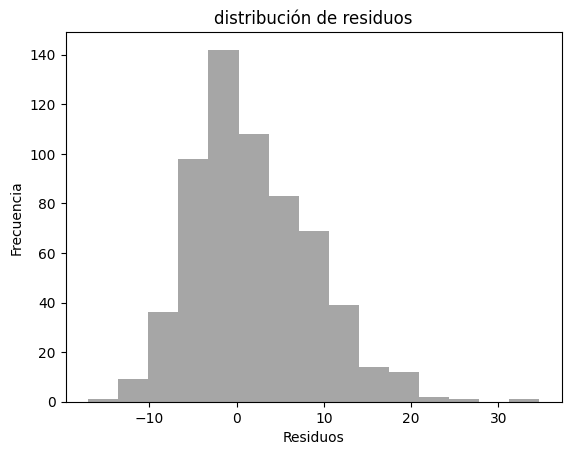

In [85]:
plt.hist(residuos, bins=15, color="gray", alpha=0.7)
plt.title("distribución de residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")

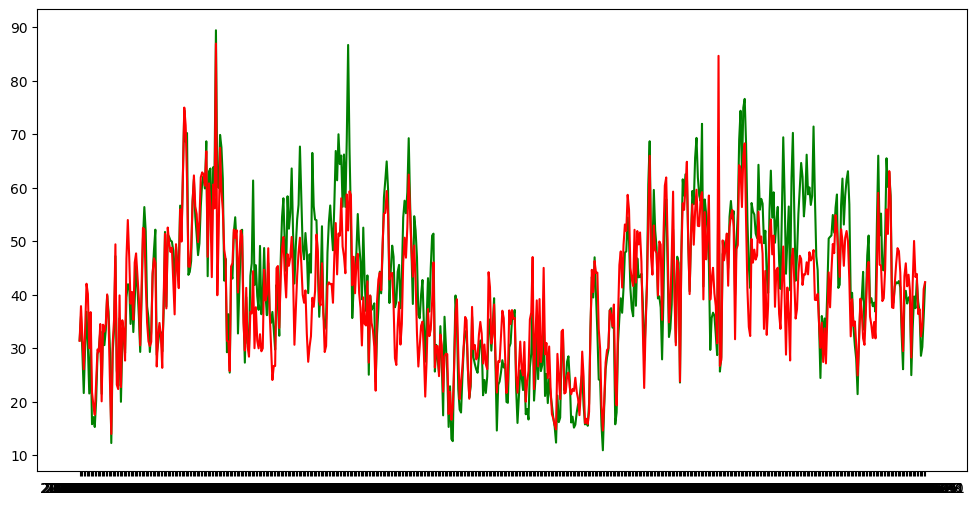

In [86]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='-', color='green')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='red')

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [88]:
data=data.sort_values(by='fecha')
splt_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [89]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [90]:
y_pred=rf_model.predict(X_test)

In [91]:
y_pred

array([28.45958223, 35.84405187, 32.78519543, 22.04449628, 30.3219211 ,
       39.59195359, 33.57343287, 28.85780881, 29.34448538, 25.68293822,
       18.50638119, 16.33951587, 22.39781599, 28.61078298, 28.226488  ,
       36.50741639, 21.72020415, 33.37929774, 35.65170635, 37.1085236 ,
       36.46156083, 33.43810243, 27.19443573, 15.79863815, 27.8632044 ,
       36.46212463, 51.43640364, 28.52556521, 21.5303454 , 41.03788942,
       23.75317438, 39.50493804, 35.22303135, 22.79617964, 46.58807428,
       53.31599469, 47.48214805, 36.60206996, 38.94516861, 36.29316065,
       47.10987412, 48.35134829, 41.07227619, 41.02776808, 28.52769265,
       42.6839416 , 57.18200043, 52.61661213, 44.59601179, 33.16073408,
       32.96303684, 30.29813507, 28.35747974, 46.90495375, 48.76999535,
       47.36013615, 22.98914982, 27.9745026 , 30.2801517 , 32.59180569,
       24.38751232, 39.51800403, 51.28180803, 36.64334959, 51.60815377,
       47.35269687, 48.04643353, 47.86461305, 42.46345927, 36.81